In [10]:
import kagglehub
import shutil

dataset_path = "/content/animal_dataset"

print("Downloading dataset...")
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

# Move dataset to /content/ to ensure it’s accessible
shutil.move(path, dataset_path)

print("Dataset saved at:", dataset_path)


In [5]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [6]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is being used.


In [7]:
# Path to the dataset
dataset_path = "/content/animal_dataset/animals/animals"

# List all the classes (Animal Types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')


Number of Classes: 90
Classes: ['jellyfish', 'beetle', 'goldfish', 'mosquito', 'oyster', 'duck', 'sheep', 'crow', 'reindeer', 'zebra', 'goat', 'chimpanzee', 'hyena', 'woodpecker', 'possum', 'leopard', 'rat', 'owl', 'pig', 'dolphin', 'kangaroo', 'otter', 'gorilla', 'cow', 'wolf', 'seahorse', 'hummingbird', 'bee', 'coyote', 'parrot', 'bear', 'butterfly', 'lizard', 'sparrow', 'boar', 'cockroach', 'orangutan', 'pelecaniformes', 'fly', 'caterpillar', 'seal', 'eagle', 'mouse', 'ladybugs', 'pigeon', 'deer', 'squid', 'bison', 'shark', 'okapi', 'hedgehog', 'grasshopper', 'squirrel', 'hare', 'cat', 'bat', 'lobster', 'starfish', 'hamster', 'flamingo', 'swan', 'antelope', 'panda', 'penguin', 'donkey', 'tiger', 'koala', 'crab', 'hippopotamus', 'rhinoceros', 'sandpiper', 'porcupine', 'horse', 'ox', 'dragonfly', 'raccoon', 'turkey', 'snake', 'goose', 'moth', 'elephant', 'wombat', 'dog', 'whale', 'fox', 'lion', 'hornbill', 'octopus', 'turtle', 'badger']


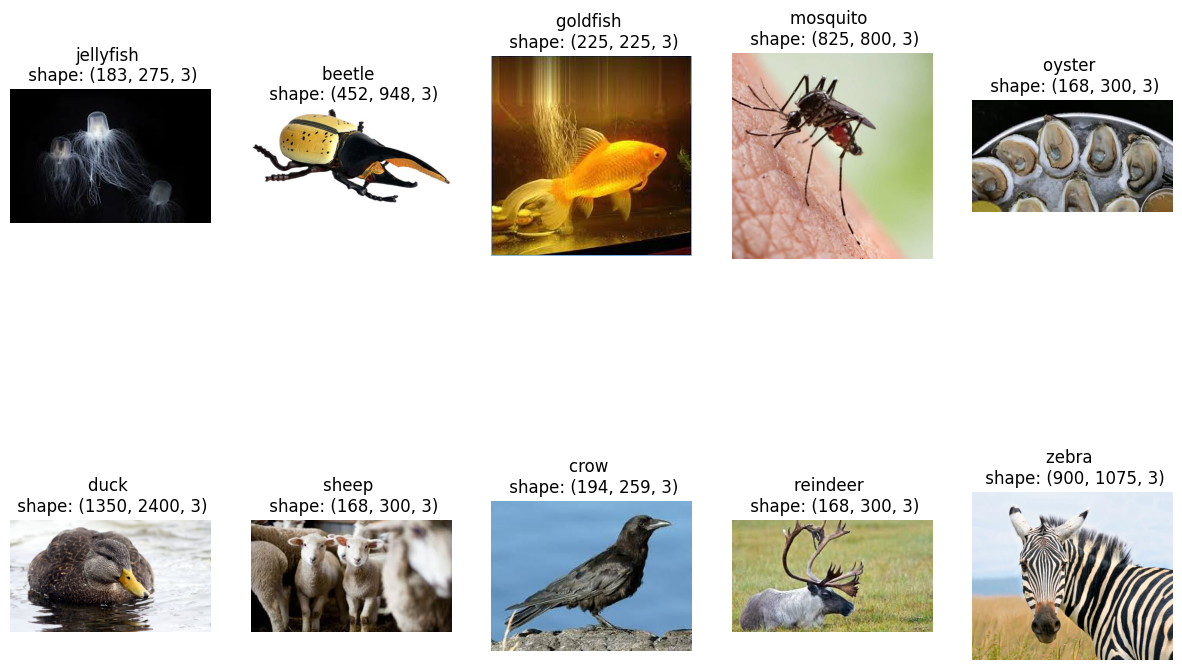

In [8]:
plt.figure(figsize=(15,10))
for i, class_name in enumerate(classes[:10]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [9]:

# Preprocessing the data.
# Define image size and batch_size - Trained model - MobileNetV2 - 224 x 224
img_size = (224, 224)
batch_size = 64 # There can be 64 images in a batch

# Data Augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [10]:
# Map the classes - class_indices
class_indices = train_generator.class_indices
print(class_indices)
# Extract class names
class_names = list(class_indices.keys())
print("Class Names:", class_names)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 